In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
start_date, end_date = '2014-11-20', '2020-07-23'

In [4]:
data = w.edb('M0329526,M0329527', start_date, end_date)

In [5]:
df = pd.DataFrame(data.Data, columns=data.Times, index=['buy', 'sell'])
df = df.T

In [6]:
df['net'] = df['buy'] - df['sell']

In [7]:
data = w.wsd('000300.SH', 'close', start_date, end_date)

In [8]:
prices = pd.DataFrame(data.Data, index=data.Codes, columns=data.Times)
prices = prices.T

Text(0, 0.5, '亿元')

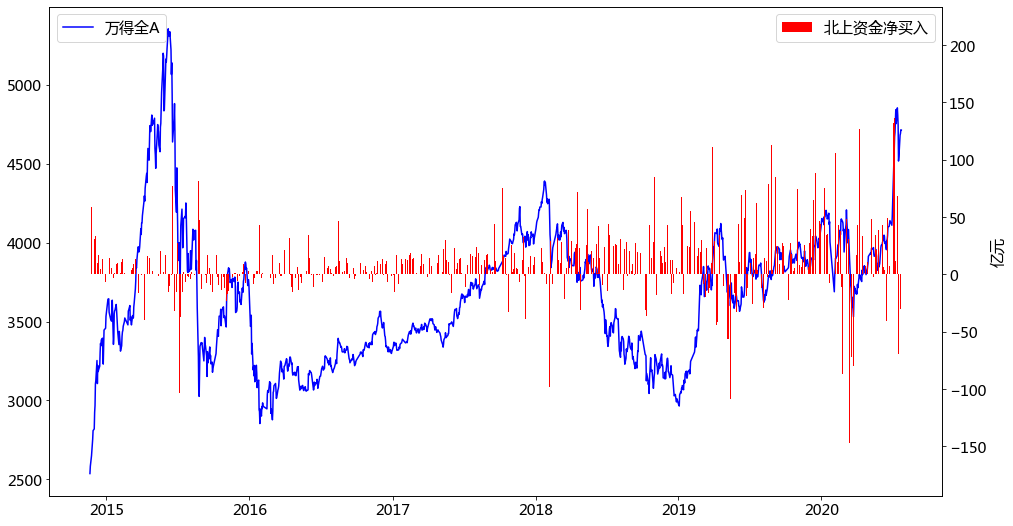

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(prices['000300.SH'], color='blue', label='万得全A')
axx = ax.twinx()
axx.bar(df.index, df['net'], color='red', label='北上资金净买入')
# axx.plot(df['net'].rolling(5).sum(), color='darkorange', label='北上资金滚动周度净买入')

ax.legend(fontsize=15, loc='upper left')
axx.legend(fontsize=15, loc='upper right')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
axx.set_ylabel('亿元', fontsize=15)

In [119]:
tdf = pd.concat([df, prices], axis=1).dropna()
tdf.index = pd.to_datetime(tdf.index)

In [121]:
tdf['sum'] = tdf['net'].rolling(5).sum()
tdf['return'] = tdf['000300.SH'].pct_change(5)

In [122]:
y = tdf['return'].dropna()
x = tdf.loc[y.index, 'sum']
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef) 

In [123]:
coef, poly1d_fn

(array([ 0.00011811, -0.00239881]), poly1d([ 0.00011811, -0.00239881]))

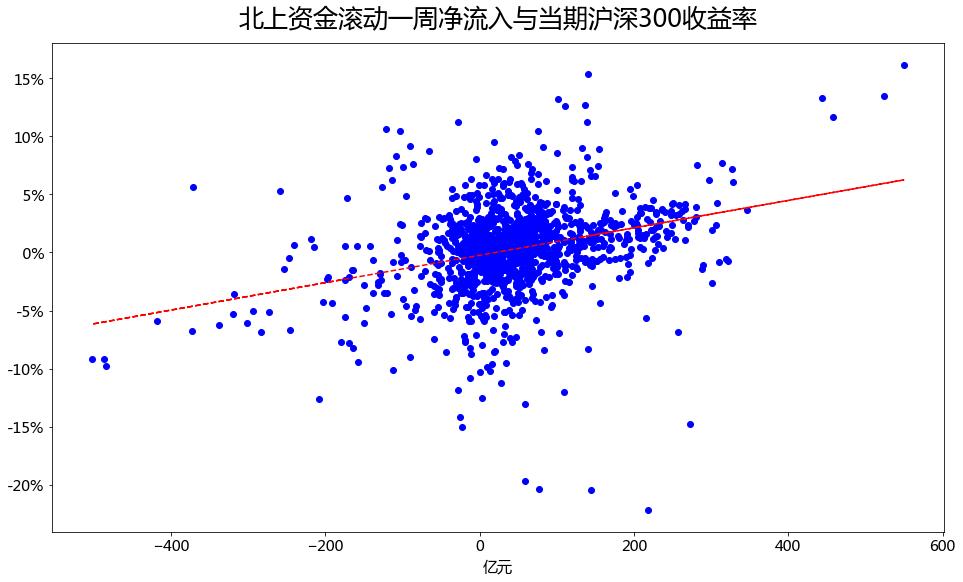

In [124]:
fig, ax = plt.subplots(figsize=(16, 9))

# ax.scatter(x, y, color='blue')
ax.plot(x, y, 'bo', x, poly1d_fn(x), '--r')

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.set_xlabel('亿元', fontsize=15)
_ = ax.set_title('北上资金滚动一周净流入与当期沪深300收益率', fontsize=25, y=1.02)

In [125]:
y = tdf['return'].dropna().shift(-5).dropna()
x = tdf.loc[y.index, 'sum']
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef) 

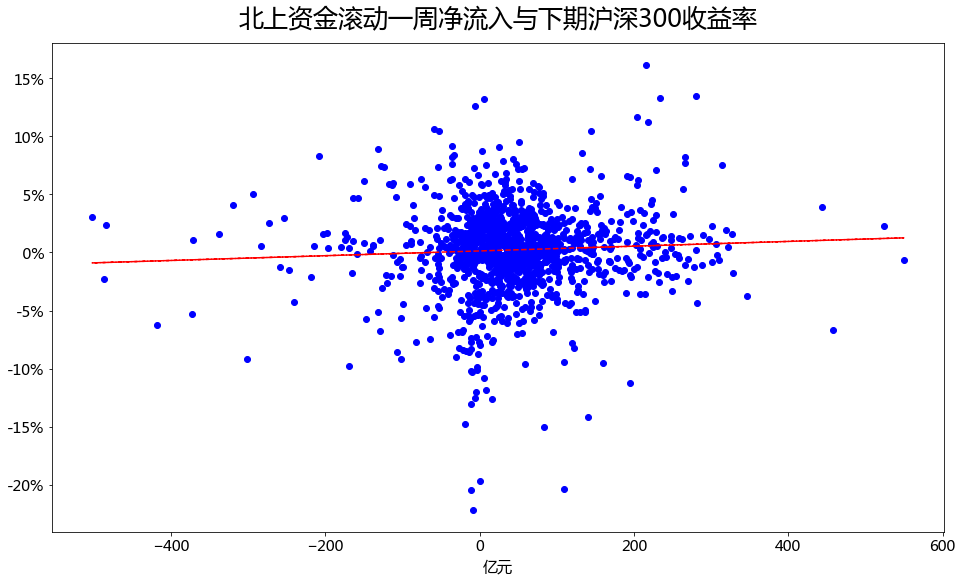

In [126]:
fig, ax = plt.subplots(figsize=(16, 9))

# ax.scatter(x, y, color='blue')
ax.plot(x, y, 'bo', x, poly1d_fn(x), '--r')

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.set_xlabel('亿元', fontsize=15)
_ = ax.set_title('北上资金滚动一周净流入与下期沪深300收益率', fontsize=25, y=1.02)

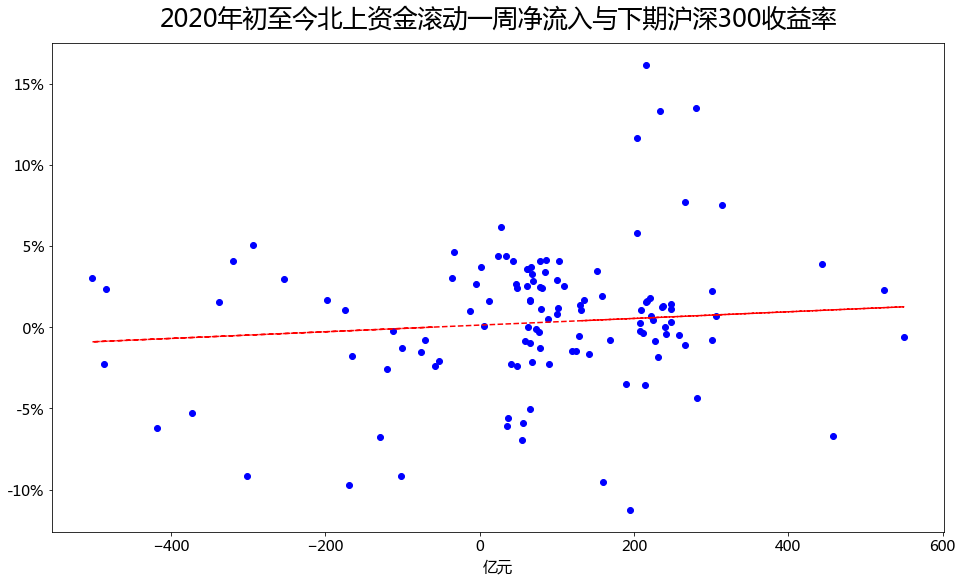

In [127]:
fig, ax = plt.subplots(figsize=(16, 9))

# ax.scatter(x, y, color='blue')
ax.plot(x[x.index >= '2020-01-01'], y[y.index >= '2020-01-01'], 'bo', x, poly1d_fn(x), '--r')

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.set_xlabel('亿元', fontsize=15)
_ = ax.set_title('2020年初至今北上资金滚动一周净流入与下期沪深300收益率', fontsize=25, y=1.02)